# Table of Contents
```
1. Business Understanding
   1.1. Project Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. Data Loading
   2.3. Exploratory Data Analysis (EDA)
        2.3.1. Understand the data with Descriptive Statistics on the raw data
        2.3.2. Draw Univariate plots to better understand each attribute
3. Research
4. Data Preprocessing
5. Visualization
```
   

# 1. Business Understanding

### 1.1. Project Description

**`Problem Statement`**: 

1. The data given is near **Ann Arbor, Michigan, United States** contained in file `data/annarbor.csv`.
2. Draw a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
3. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
4. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

**`Type of the problem`**: Visualization - Line graph & Scatter plot

**`Data source`**: From a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. 

**`Author`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc. 

In [1]:
# Import the necessary libraries for this project
import sys               as sys
import numpy             as np
import pandas            as pd
import matplotlib        as mpl

from matplotlib          import pyplot as plt
from pandas.plotting     import scatter_matrix

#  Check the versions of the imported libraries
print("Python:     {}".format(sys.version))
print("Pandas:     {}".format(pd.__version__))
print("Matplotlib: {}".format(mpl.__version__))

Python:     3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Pandas:     1.3.2
Matplotlib: 3.4.2


## 2.2. Data Loading

In [2]:
# Load weather data for "Ann Arbor, Michigan, United States"
data_source = {
               'filepath'   : 'data',
               'hashid'     : 'annarbor',
               'fileformat' : 'csv'
              }

weather_df  = pd.read_csv('{}/{}.{}'.format(data_source['filepath'],
                                            data_source['hashid'],
                                            data_source['fileformat']))

## 2.3. Exploratory Data Analysis (EDA)

### 2.3.1. Understand the data with Descriptive Statistics on the raw data

In [3]:
print('Dimensions of the WEATHER dataset:')
print(weather_df.shape, '\n')

Dimensions of the WEATHER dataset:
(165085, 4) 



In [4]:
print('First 10 rows:')
weather_df.head(10).style.background_gradient(cmap='Blues', axis=0)

First 10 rows:


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


In [5]:
print('Last 10 rows:')
weather_df.tail(10).style.background_gradient(cmap='Blues', axis=0)

Last 10 rows:


,ID,Date,Element,Data_Value
165075,USC00205451,2014-10-03,TMIN,100
165076,USC00205050,2013-09-29,TMAX,261
165077,USC00205050,2014-07-14,TMIN,172
165078,USC00200032,2011-06-27,TMIN,144
165079,USC00202308,2005-03-02,TMIN,-67
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117
165084,USC00207312,2006-09-04,TMIN,111


In [6]:
print('Statistical summary of the WEATHER dataset:')
print(weather_df.describe(), '\n')
print('Number of Stations recording weather data each day: ', len(weather_df['ID'].unique()), '\n')
print('Station IDs: \n', weather_df['ID'].unique(), '\n')

Statistical summary of the WEATHER dataset:
          Data_Value
count  165085.000000
mean       95.422116
std       123.515131
min      -343.000000
25%         0.000000
50%        94.000000
75%       189.000000
max       406.000000 

Number of Stations recording weather data each day:  24 

Station IDs: 
 ['USW00094889' 'USC00208972' 'USC00200032' 'USC00205563' 'USC00200230'
 'USW00014833' 'USC00207308' 'USC00203712' 'USW00004848' 'USC00200220'
 'USC00205822' 'USC00200842' 'USC00205450' 'USC00201250' 'USC00207320'
 'USC00200228' 'USC00202308' 'USW00014853' 'USC00205050' 'USC00208202'
 'USC00208080' 'USC00207312' 'USC00205451' 'USC00201502'] 



### 2.3.2. Draw Univariate plots to better understand each attribute

Univariate - Box and Whisker plots:


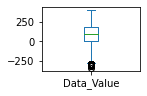

Univariate - Histograms:


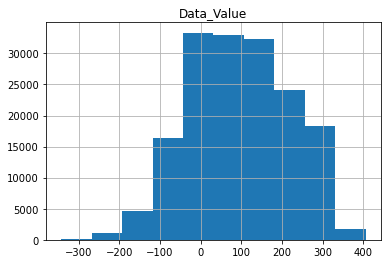

In [7]:
print('Univariate - Box and Whisker plots:')
weather_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
print('Univariate - Histograms:')
weather_df.hist()
plt.show()

# 3. Research

During this stage, a study on the type(s) of graphs/ charts/ plots to be used is determined. In this project, the line chart and scatter-matrix are given as part of the problem statement itself. Hence, no stydy needs to be done.

# 4. Data Preprocessing

During this stage, prepare the data required for visualizations.

In [8]:
# Convert all the 10th of Celcius in Data_Values to °C
weather_df['Data_Value'] = weather_df['Data_Value'] / 10

# Sort the df by Station IDs & by Date
#weather_df.sort(['ID', 'Date'], ascending=True, inplace=True)

# Create Year & Month-Day columns
weather_df['Year'], weather_df['Month-Day'] = zip(*weather_df['Date'].apply(lambda x: (x[:4], x[5:])))

# Drop the Leap days
weather_df = weather_df[weather_df['Month-Day'] != '02-29']

# Get the Max & Min recorded tempratures, across all stations, for each day, for the years 2005-2014 & 2015
df0514_max = weather_df[(weather_df['Year'] != '2015') & (weather_df['Element'] == 'TMAX')].groupby('Month-Day').aggregate({'Data_Value': np.max})
df0514_min = weather_df[(weather_df['Year'] != '2015') & (weather_df['Element'] == 'TMIN')].groupby('Month-Day').aggregate({'Data_Value': np.min})
df15_max   = weather_df[(weather_df['Year'] == '2015') & (weather_df['Element'] == 'TMAX')].groupby('Month-Day').aggregate({'Data_Value': np.max})
df15_min   = weather_df[(weather_df['Year'] == '2015') & (weather_df['Element'] == 'TMIN')].groupby('Month-Day').aggregate({'Data_Value': np.min})

# Get the record breaking tempratures in 2015 compared to 2005-2014
df15_recbrk_max = np.where(df15_max['Data_Value'] > df0514_max['Data_Value'])
df15_recbrk_min = np.where(df15_min['Data_Value'] < df0514_min['Data_Value'])

# 5. Visualization

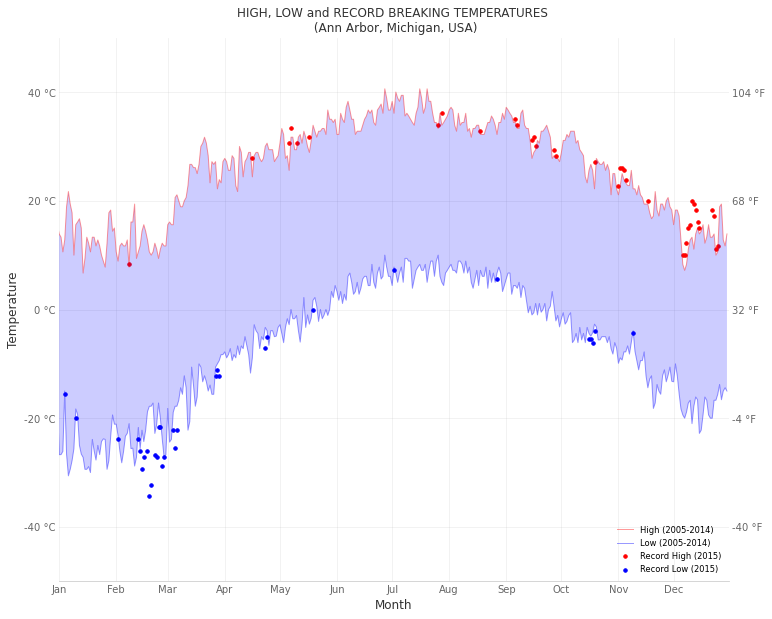

In [9]:
plt.figure(figsize= (12,10))
ax1 = plt.gca()    # Get the Primary axis
ax2 = ax1.twinx()  # Get the Secondary axis

# Draw the Line plots for the Min & Max tempratures for the years 2005 - 2014
ax2.plot(df0514_max.values, '-', color = 'r', linewidth = 1, label = 'High (2005-2014)', alpha = 0.4)
ax2.plot(df0514_min.values, '-', color = 'b', linewidth = 1, label = 'Low (2005-2014)', alpha = 0.4)

# Draw the Scatter plot for the record breaking tempratures for the year 2015
plt.scatter(df15_recbrk_max, df15_max.iloc[df15_recbrk_max], s = 12, c = 'r', label = 'Record High (2015)')
plt.scatter(df15_recbrk_min, df15_min.iloc[df15_recbrk_min], s = 12, c = 'b', label = 'Record Low (2015)')

# Shade between the Line plots for the Min and Max tempratures
ax2.fill_between(range(len(df0514_min)), df0514_min['Data_Value'], df0514_max['Data_Value'], 
                       facecolor = 'blue', alpha = 0.2)

# Set the Title, Legends & Labels for X-axis & Y-axis
ax1.grid(True, alpha = 0.2)
ax1.set_title('HIGH, LOW and RECORD BREAKING TEMPERATURES \n (Ann Arbor, Michigan, USA)', fontsize = 'large', alpha = 0.8)
ax1.set_xlabel('Month', fontsize = 'large', alpha = 0.8)
ax1.set_ylabel('Temperature', fontsize = 'large', alpha = 0.8)
ax2.legend(loc = 4, labels = ['High (2005-2014)','Low (2005-2014)','Record High (2015)','Record Low (2015)'], 
           fontsize = 'small', frameon = False)

# Set the Limits, Ticks and Tick-Labels for the X-axis
# Set X ticks at [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
xticks = ((pd.date_range('1/1/2015', periods = 12, freq = 'M')) + pd.Timedelta('1D')).strftime('%j').astype(int).sort_values()
# Set X tick values as ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
xticklabels = pd.to_datetime(xticks, format = '%j').strftime('%b')
ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax1.set_xticklabels(xticklabels, fontsize = 'medium', alpha = 0.6)

# Set the Limits, Ticks and Tick-Labels for the Primary Y-axis
axlim = ax1.set_ylim(-50,50)
yticks = pd.Series([-40, -20, 0, 20, 40])
yticklabels_ax1 = pd.Series(yticks).astype(int).astype(str) + ' °C'
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels_ax1, fontsize = 'medium', alpha = 0.6)

# Set the Limits, Ticks and Tick-Labels for the Secondary Y-axis, and Convert Celcius to Fahrenheit
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticklabels_ax2 = (yticks * (9/5) + 32).astype(int)
yticklabels_ax2 = pd.Series(yticklabels_ax2).astype(int).astype(str) + ' °F'
ax2.set_yticklabels(yticklabels_ax2, fontsize = 'medium', alpha = 0.6) 

# Remove Ticks from both Primary and Secondary axes
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Remove the Outer frame from all 4 sides
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)

# Set only the Bottom frame visible
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.2)

plt.show()